# Step1:数据准备

In [2]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')



In [4]:
import pandas_profiling

pfr = pandas_profiling.ProfileReport(data)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Step2:数据探索

In [3]:
# 查看数据整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
Date             106644 non-null object
Location         106644 non-null object
MinTemp          106183 non-null float64
MaxTemp          106413 non-null float64
Rainfall         105610 non-null float64
Evaporation      60974 non-null float64
Sunshine         55718 non-null float64
WindGustDir      99660 non-null object
WindGustSpeed    99702 non-null float64
WindDir9am       99166 non-null object
WindDir3pm       103788 non-null object
WindSpeed9am     105643 non-null float64
WindSpeed3pm     104653 non-null float64
Humidity9am      105327 non-null float64
Humidity3pm      103932 non-null float64
Pressure9am      96107 non-null float64
Pressure3pm      96123 non-null float64
Cloud9am         66303 non-null float64
Cloud3pm         63691 non-null float64
Temp9am          105983 non-null float64
Temp3pm          104599 non-null float64
RainToday        105610 non-null object
Ra

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2012/1/19,MountGinini,12.1,23.1,0.0,NaN,NaN,W,30.0,N,...,60.0,54.0,NaN,NaN,NaN,NaN,17.0,22.0,No,No
1,2015/4/13,Nhil,10.2,24.7,0.0,NaN,NaN,E,39.0,E,...,63.0,33.0,1021.9,1017.9,NaN,NaN,12.5,23.7,No,Yes
2,2010/8/5,Nuriootpa,-0.4,11.0,3.6,0.4,1.6,W,28.0,N,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,Yes,No
3,2013/3/18,Adelaide,13.2,22.6,0.0,15.4,11.0,SE,44.0,E,...,47.0,34.0,1025.0,1022.2,NaN,NaN,15.2,21.7,No,No
4,2011/2/16,Sale,14.1,28.6,0.0,6.6,6.7,E,28.0,NE,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,No,No


In [5]:
# 查看数据缺失情况
miss_stat = data.isnull().sum()/data.isnull().count()

# miss_stat

In [6]:
# 查看样本分布情况
pd.Series(data['RainTomorrow']).value_counts()

No     82786
Yes    23858
Name: RainTomorrow, dtype: int64

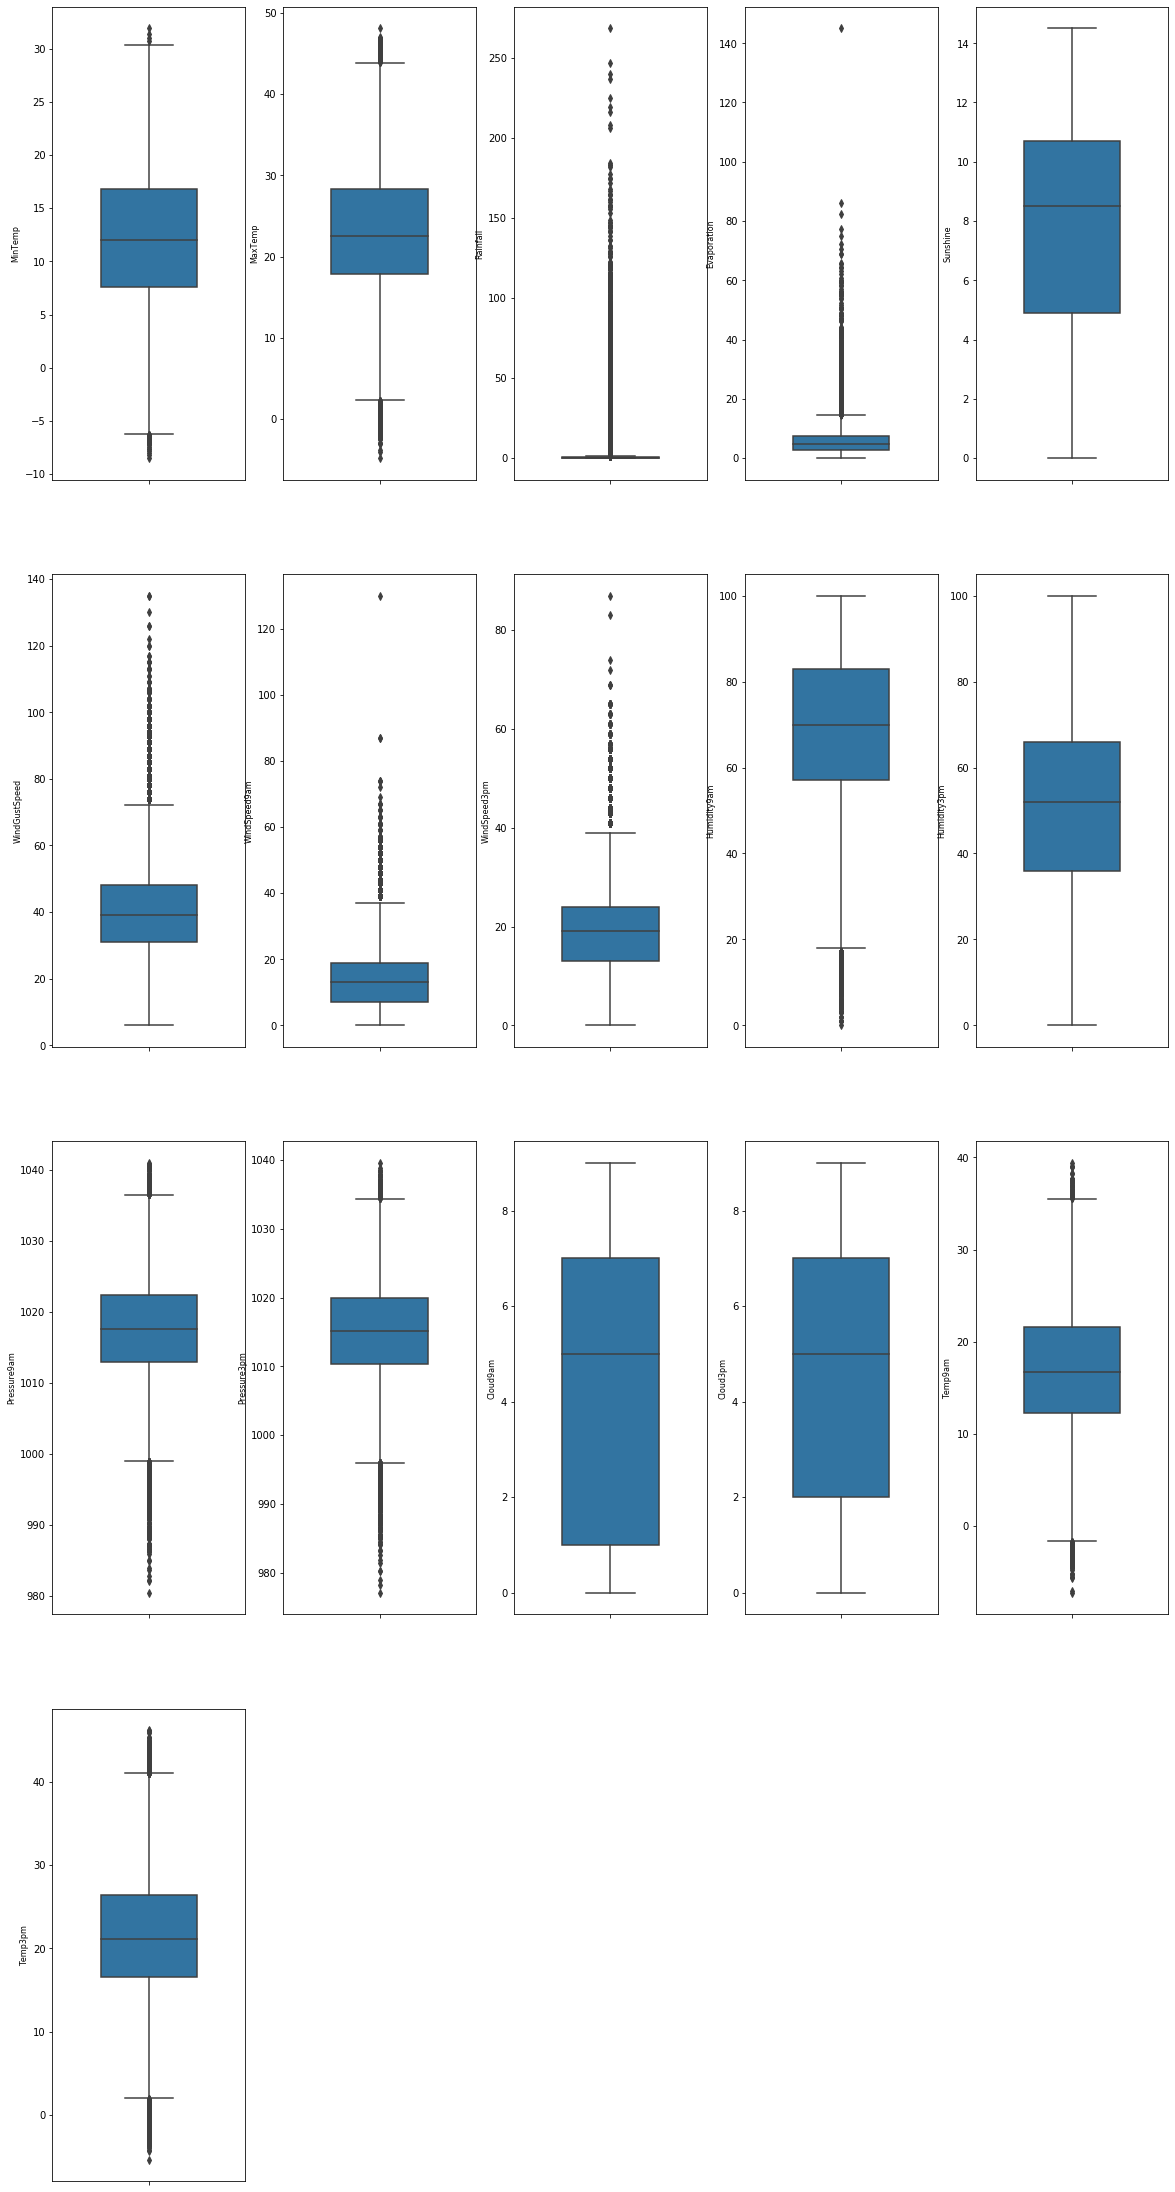

In [18]:
# 箱型图查看数据分布情况，异常值情况

column = [x for x in data.columns if data[x].dtype == np.float][:]

fig = plt.figure(figsize=(20,40))
for i in range(16):
    plt.subplot(4,5,i+1)
    sns.boxplot(data[column[i]],orient="v",width=0.5)
    plt.ylabel(column[i],fontsize=8)
plt.show()

In [21]:
miss_stat = data.isnull().sum()
miss_stat


Date                 0
Location             0
MinTemp            461
MaxTemp            231
Rainfall          1034
Evaporation      45670
Sunshine         50926
WindGustDir       6984
WindGustSpeed     6942
WindDir9am        7478
WindDir3pm        2856
WindSpeed9am      1001
WindSpeed3pm      1991
Humidity9am       1317
Humidity3pm       2712
Pressure9am      10537
Pressure3pm      10521
Cloud9am         40341
Cloud3pm         42953
Temp9am            661
Temp3pm           2045
RainToday         1034
RainTomorrow         0
dtype: int64

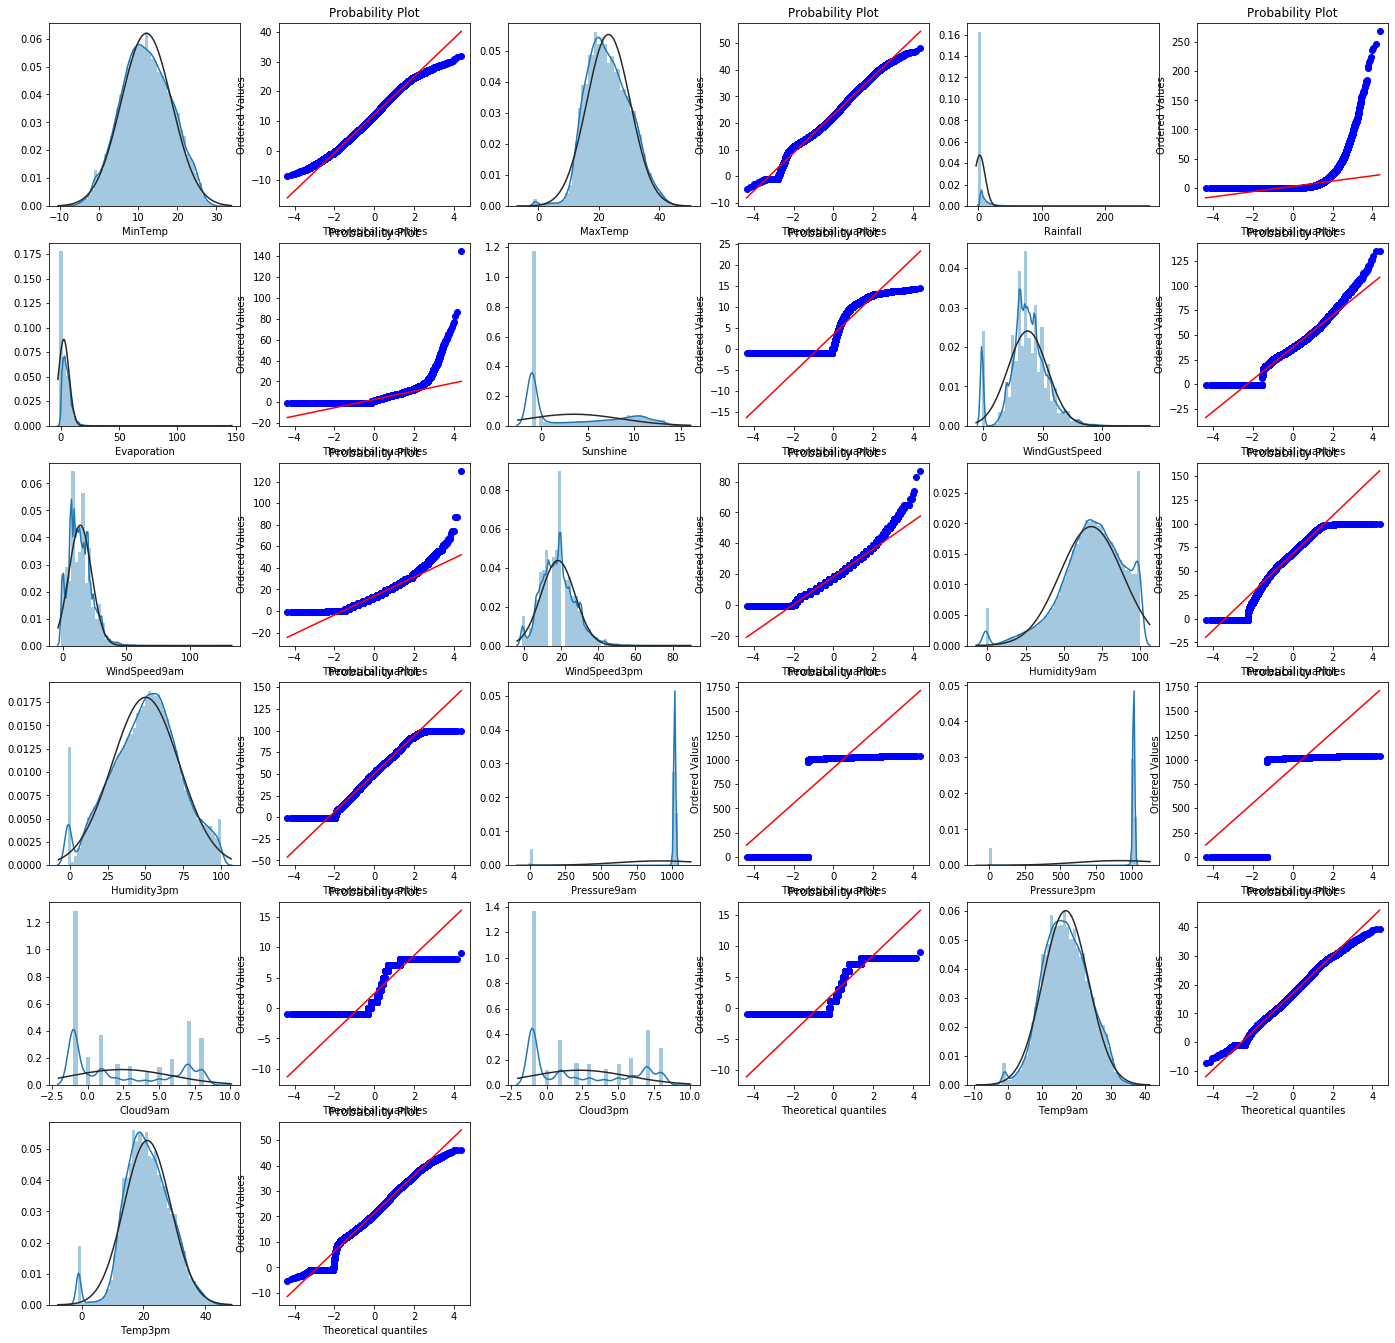

In [22]:
# 直方图查看数据分布，Q-Q图查看是否近似正态分布
from scipy import stats

train_data = data.fillna(-1)
train_cols = 6
train_rows = len(column)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in column:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

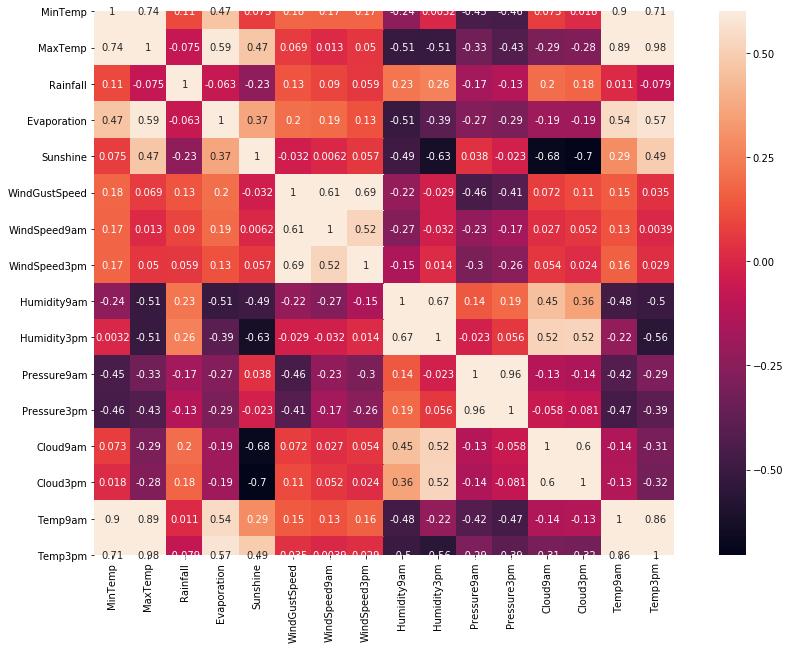

In [40]:
# 热力图查看特征变量的相关性

corr_data = data[column]
corr = corr_data.corr()
ax = plt.subplots(figsize=(16, 10))#调整画布大小
ax = sns.heatmap(corr, vmax=.6, square=True, annot=True)#画热力图   annot=True 显示系数


# Step3:数据预处理

In [214]:
# 类别特征编码
numerical_features = [x for x in data.columns if data[x].dtype == np.float]
category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']
def category_encode(x):
    mapp = dict(zip(x.unique().tolist(),range(len(x.unique().tolist()))))
    
    def map_function(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return map_function

print("编码前：\n",data['Location'].unique())
for x in category_features:
    data[x] = data[x].apply(category_encode(data[x]))

print("编码后：\n",data['Location'].unique())


编码前：
 ['MountGinini' 'Nhil' 'Nuriootpa' 'Adelaide' 'Sale' 'Walpole' 'Albany'
 'Moree' 'Bendigo' 'NorfolkIsland' 'WaggaWagga' 'Witchcliffe' 'GoldCoast'
 'Ballarat' 'Williamtown' 'Melbourne' 'Launceston' 'Darwin' 'Newcastle'
 'Sydney' 'Wollongong' 'CoffsHarbour' 'Canberra' 'Dartmoor' 'MountGambier'
 'Mildura' 'Hobart' 'PerthAirport' 'SydneyAirport' 'SalmonGums' 'Uluru'
 'Tuggeranong' 'AliceSprings' 'Penrith' 'MelbourneAirport' 'Richmond'
 'Brisbane' 'Woomera' 'BadgerysCreek' 'Portland' 'NorahHead' 'PearceRAAF'
 'Albury' 'Perth' 'Cobar' 'Katherine' 'Watsonia' 'Townsville' 'Cairns']
编码后：
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [215]:
# 缺失值填充
data = data.fillna(-1)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,12.1,23.1,0.0,-1.0,-1.0,0,30.0,0,...,60.0,54.0,-1.0,-1.0,-1.0,-1.0,17.0,22.0,0,No
1,1,1,10.2,24.7,0.0,-1.0,-1.0,1,39.0,1,...,63.0,33.0,1021.9,1017.9,-1.0,-1.0,12.5,23.7,0,Yes
2,2,2,-0.4,11.0,3.6,0.4,1.6,0,28.0,0,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,1,No
3,3,3,13.2,22.6,0.0,15.4,11.0,2,44.0,1,...,47.0,34.0,1025.0,1022.2,-1.0,-1.0,15.2,21.7,0,No
4,4,4,14.1,28.6,0.0,6.6,6.7,1,28.0,2,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,0,No


# Step4:数据建模

In [216]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn import metrics
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

# 样本切分
data_target = data['RainTomorrow']
data_features = data[[x for x in data.columns if x != 'RainTomorrow']]
x_train,x_test,y_train,y_test = train_test_split(data_features,data_target,test_size=0.2,random_state = 2020)

# 模型拟合
clf = XGBClassifier()
clf.fit(x_train,y_train)

# 模型评估
y_predict = clf.predict(x_test)
print(len(y_predict))
print('The accuracy of the xgboost is :',metrics.accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

[17:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
21329
The accuracy of the xgboost is : 0.8575179333302076
              precision    recall  f1-score   support

          No       0.88      0.95      0.91     16553
         Yes       0.75      0.55      0.63      4776

    accuracy                           0.86     21329
   macro avg       0.81      0.75      0.77     21329
weighted avg       0.85      0.86      0.85     21329



[17:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


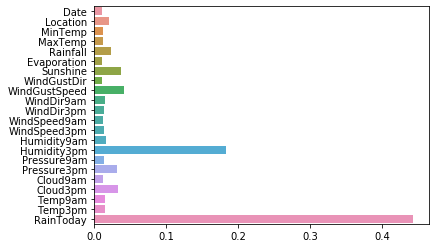

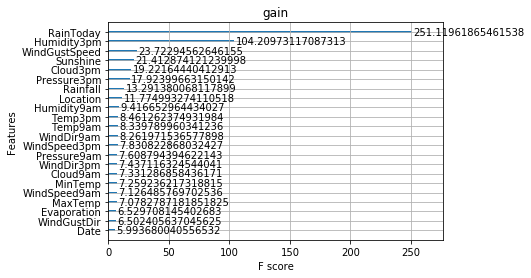

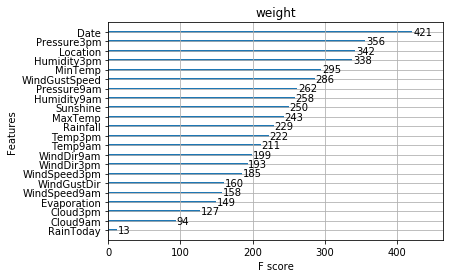

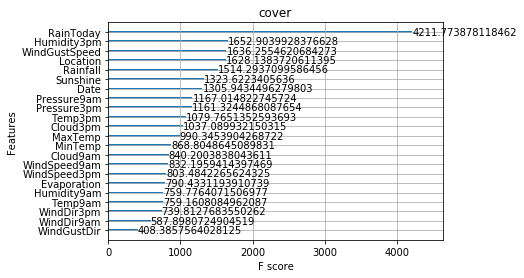

acc= 0.8575179333302076


In [217]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans

# 特征重要性评分
sns.barplot(y=data_features.columns, x=clf.feature_importances_)


ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

# Step5:模型评估

In [218]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10,shuffle=True)
n = 1
clf = XGBClassifier()
for train,test in folds.split(data_features,data_target):
    print('fold {}/10......'.format(n))
    x_tr,x_te = data_features.iloc[train],data_features.iloc[test]
    y_tr,y_te = data_target[train],data_target[test]
    clf.fit(x_tr,y_tr)
    y_predict = clf.predict(x_te)
    print('The accuracy of the xgboost is :',metrics.accuracy_score(y_te,y_predict))
    print(classification_report(y_te,y_predict))
    n += 1

fold 1/10......
[17:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the xgboost is : 0.8652601969057665
              precision    recall  f1-score   support

          No       0.89      0.95      0.92      8293
         Yes       0.76      0.57      0.65      2372

    accuracy                           0.87     10665
   macro avg       0.82      0.76      0.78     10665
weighted avg       0.86      0.87      0.86     10665

fold 2/10......
[17:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd lik

# Step6:模型优化

In [219]:
from sklearn.model_selection import GridSearchCV

# 参数调整-网格搜索
learning_rate = [0.1,0.3,0.6,0.9]
subsample = [0.7,0.8,0.9]
colsample_bytree = [0.4,0.6,0.8]
max_depth = [3,4,5,6,7,8]

parammeters = {'learning_rate':learning_rate,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'max_depth':max_depth}

model = XGBClassifier(n_estimators = 50)
clf = GridSearchCV(model,parammeters,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train,y_train)
clf.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  8.4min finished


[17:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.6,
 'learning_rate': 0.3,
 'max_depth': 6,
 'subsample': 0.9}

In [220]:
# 调整后评估模型
x_train,x_test,y_train,y_test = train_test_split(data_features,data_target,test_size=0.2,random_state = 2020)
clf = XGBClassifier(colsample_bytree = 0.6,learning_rate = 0.3,max_depth = 6,subsample = 0.9)
clf = clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('The accuracy of the xgboost is :',metrics.accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

[17:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the xgboost is : 0.8584556237985841
              precision    recall  f1-score   support

          No       0.88      0.95      0.91     16553
         Yes       0.75      0.55      0.64      4776

    accuracy                           0.86     21329
   macro avg       0.81      0.75      0.77     21329
weighted avg       0.85      0.86      0.85     21329

